In [15]:
# Data Cleaning Script
import pandas as pd

# Load raw dataset
df = pd.read_csv("/content/Frailty_data.csv")

# Strip trailing and leading spaces from column names
df.columns = df.columns.str.strip()

# Identify object (string) columns and remove extra spaces within them
str_columns = df.select_dtypes(include=['object']).columns
df[str_columns] = df[str_columns].apply(lambda col: col.str.strip())

# Rename columns for consistency and ease of access
column_mapping = {
    'Height (Inches)': 'height',
    'Weight (Pounds)': 'weight',
    'Age': 'age',
    'Grip strength': 'grip_strength',
    'Frailty': 'frailty'
}
df.rename(columns=column_mapping, inplace=True)

# Convert frailty labels ('Y', 'N') into binary values (1, 0)
df['frailty'] = df['frailty'].map({'Y': 1, 'N': 0})

# Save the cleaned dataset
df.to_csv('/content/cleaned_data.csv', index=False)

print("Data cleaning complete. Cleaned file saved as 'cleaned_data.csv'.")

Data cleaning complete. Cleaned file saved as 'cleaned_data.csv'.


<ipython-input-17-c216dd47a3c9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='frailty', y='Weight', palette=['blue', 'red'])


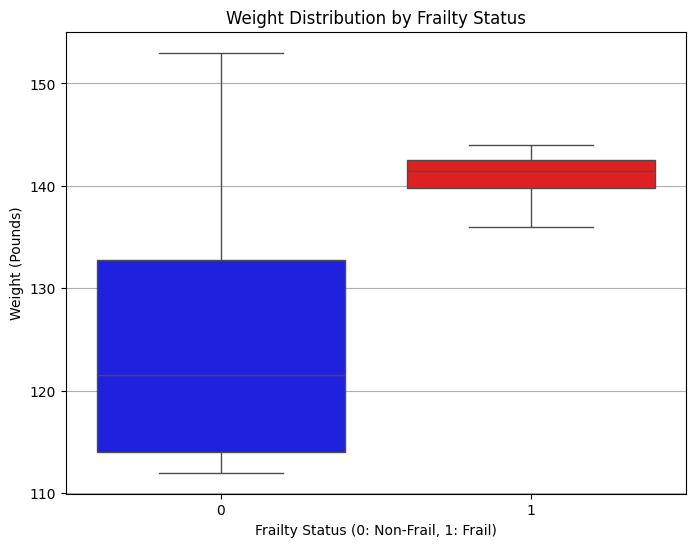

In [17]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("/content/cleaned_data.csv")

# Ensure column names have no leading/trailing spaces
df.columns = df.columns.str.strip()

# Box plot: Weight distribution across Frailty status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='frailty', y='Weight', palette=['blue', 'red'])

# Customize labels and title
plt.title("Weight Distribution by Frailty Status")
plt.xlabel("Frailty Status (0: Non-Frail, 1: Frail)")
plt.ylabel("Weight (Pounds)")
plt.grid(axis='y')

# Show plot
plt.show()
